In [48]:
# !pip install pandas numpy tensorflow matplotlib imageio scikit-image

In [49]:
SOURCE_FOLDER = './Source/'
T1_FOLDER = SOURCE_FOLDER + 'Tr1/TrainT1/'
T2_FOLDER = SOURCE_FOLDER + 'Tr2/TrainT2/'

batch_size = 10 
img_height = 217 
img_width = 181

Import Libraries

In [50]:
import glob
import imageio
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage.io import imread 
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.utils import plot_model


Data Loading

In [51]:
t1_images = glob.glob(T1_FOLDER+'*.png')
t2_images = glob.glob(T2_FOLDER+'*.png')

In [52]:
t1_df = pd.DataFrame({'t1_images': t1_images, 'label': 't1'})
t2_df = pd.DataFrame({'t2_images': t2_images, 'label': 't2'})

In [53]:
img_lst = []
for idx, img in enumerate(t1_df['t1_images']):
    pxl = imread(img)
    img_lst.append(pxl)

t1_df['img_pxl'] = img_lst

img_lst = []
for idx, img in enumerate(t2_df['t2_images']):
    pxl = imread(img)
    img_lst.append(pxl)

t2_df['img_pxl'] = img_lst

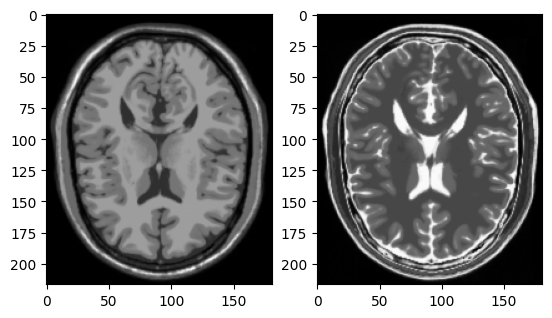

In [54]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(t1_df['img_pxl'][0], cmap='grey')
axs[1].imshow(t2_df['img_pxl'][0], cmap='grey')
plt.show();


In [55]:
t1_images = np.zeros((t1_df.shape[0], img_height, img_width))

for idx, img in enumerate(t1_df['img_pxl']):
    t1_images[idx, :, :] = resize(img, (img_height, img_width))
    
t1_images.shape

(43, 217, 181)

In [56]:
t2_images = np.zeros((t2_df.shape[0], img_height, img_width))

for idx, img in enumerate(t2_df['img_pxl']):
    t2_images[idx, :, :] = resize(img, (img_height, img_width))
    
t2_images.shape

(46, 217, 181)

In [57]:
# t2_images[idx] = (pxl/127.5)-1.0
# t1_images[idx] = (pxl/127.5)-1.0

In [58]:
t1_images = t1_images.reshape(t1_images.shape[0], img_height, img_width, 1).astype('float32')
t1_images = t2_images.reshape(t2_images.shape[0], img_height, img_width, 1).astype('float32')

In [59]:
t1_img_data = tf.data.Dataset.from_tensor_slices(t1_images).shuffle(t1_images.shape[0], seed=100).batch(batch_size)
t2_img_data = tf.data.Dataset.from_tensor_slices(t2_images).shuffle(t2_images.shape[0], seed=100).batch(batch_size)